## 🔰*============ Summary Overview =============*🔰
  ### 🔑 To reduce training times **be sure that runtime is set to use GPU**
  #### &emsp; (menu) Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU
  * Useful resourse for understanding Convolutional Neural Networks: [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

### 📔***Notebook: 03a_CVandCNN_Intro***
  1. **Retrieve Dataset**
    * Data is a subset of the [Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) that include only images of Pizza & Steak
    * Link to this subset is provided by [Zero-to-Mastery](https://github.com/mrdbourke/tensorflow-deep-learning).
  2.  **Visualize the Dataset**
    * view 9 random images of steak
    * view 9 random images of pizza

  3. **Preprocess Dataset & Data Augmentation** 
    * use [TensorFlow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
    * Normalize data on interval (0,1)
    * Split data into a train, validation, and test sets
    * Using Data Augmentation to overcome overfitting training data.
    * *shear, zoom, shift, and flip*.

## 📔***Notebook: 03b_CVandCNN_Build Models***
  4. **Build Models**
    * Build a very simple NN using Dense Layers as reference
    * Build a simple CNN to compare performance
    * Build a a CNN using the **[Tiny VGG architecture](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)**
  

## 📔***Notebook: 03c_CVandCNN_Viualize_Layer_Outputs***
  5. **Visualize CNN Filter Patterns**
    * Render an image after processing through the first CNN Layer.
    * Show the resulting Convolution for each output filter.
    * Display original image along side for reference.

## 🔰*============ Create a Simple Model =============*🔰

In [ ]:
#@title Helper Functions: Show_Model, Training_Plot, BuildCompileFit, ContinueTraining
#---------------Build some helper functions:

def Show_Model(model,name):
    """
      Will provide a visual representation of model,
      showing layers, and input/output shapes. 
    """
    file_name = f'{name}.png'
    plot = plot_model(model,
                      to_file=file_name,
                      show_layer_activations=True,
                      show_shapes=True)
    
    plt.figure(figsize=(8,8))
    image = mpimg.imread(file_name)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])  

def Training_Plot(history):
  """
    Will plot results from model training:
      loss,accuracy vs epochs
  """
  pd.DataFrame(history.history).plot(figsize=(10,6))
  plt.ylabel('loss')
  plt.xlabel('epochs')  


def BuildCompileFit(trn_data,val_data,layers,loss,optimizer,callbacks,metrics,
                    rndSeed,epochs,verbose=0,show_model=False,model_name='Model'):
  
  #--- Set Random Seed
  tf.random.set_seed(rndSeed)

  #--- Build Model
  model = tf.keras.Sequential(layers)

  #--- Compile Model
  model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
  
  if show_model:
     Show_Model(model,model_name)

  #--- Fit Model:
  history=model.fit(trn_data,
                    epochs=epochs,
                    steps_per_epoch=len(trn_data),
                    callbacks=callbacks,
                    validation_data=val_data,
                    validation_steps=len(val_data),
                    verbose=verbose)


  #--- Evaluate Model
  if not verbose:
    print('\nEvaluation: ',model.evaluate(trn_data),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model,history


def ContinueTraining(trn_data,val_data,model,callbacks,epochs,verbose=0):
  """
    Used to avoid recompiling a new model, 
    to continue after some initial training. 
  """

  #--- Fit Model:
  history=model.fit(trn_data,
                    epochs=epochs,
                    steps_per_epoch=len(trn_data),
                    callbacks=callbacks,
                    validation_data=val_data,
                    validation_steps=len(val_data),
                    verbose=verbose)

  #--- Evaluate Model
  if not verbose:
    print('\nEvaluation: ',model.evaluate(trn_data),'\n')              

  #------------------View Loss/Training Curve:
  Training_Plot(history)

  return model, history

In [ ]:
#--- Architecture:
layers_0 = [Input(shape=(224,224,3),name='Input'),
          Flatten(input_shape=(224,224,3),name='Flatten'),
          Dense(4,activation='relu',name='D1'),
          Dense(4,activation='relu',name='D2'),
          Dense(1,activation='sigmoid',name='Output')            
          ]

Epoch 1/5
38/38 [==============================] - 24s 617ms/step - loss: 0.9609 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
38/38 [==============================] - 22s 581ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
38/38 [==============================] - 22s 577ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
38/38 [==============================] - 22s 575ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
38/38 [==============================] - 23s 601ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


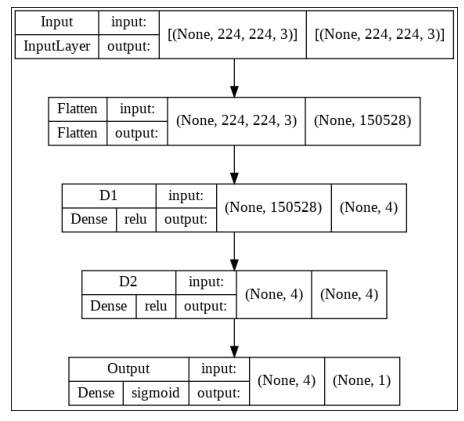

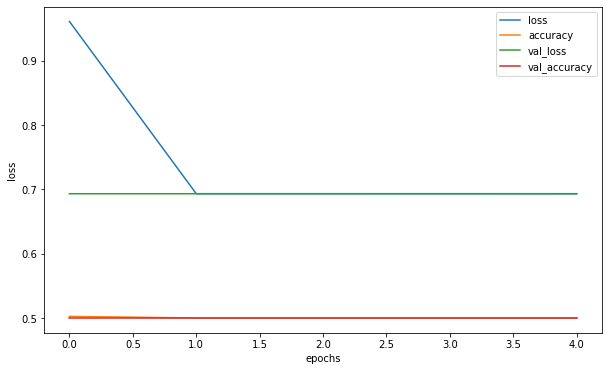

In [ ]:
#--- Build, Compile, and Fit model:
model_0,history_0 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_0,
                                   loss=tf.keras.losses.BinaryCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=None,
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

## 🔑 The simple NN model performs **no better than random guessing**: Accuracy = 50%
## ❓ Perhaps by adjusting the architecture or hyperparameters the performance can be improved.

In [ ]:
#--- Architecture:
layers_1 = [Input(shape=(224,224,3),name='Input'),
          Flatten(input_shape=(224,224,3),name='Flatten'),
          Dense(32,activation='leaky_relu',name='D1'),
          Dense(16,activation='leaky_relu',name='D2'),
          Dense(8,activation='leaky_relu',name='D3'),
          Dense(4,activation='leaky_relu',name='D4'),
          Dense(1,activation='sigmoid',name='Output')            
          ]

Epoch 1/5
38/38 [==============================] - 24s 612ms/step - loss: 1.7932 - accuracy: 0.6267 - val_loss: 0.6111 - val_accuracy: 0.7300
Epoch 2/5
38/38 [==============================] - 22s 578ms/step - loss: 0.5403 - accuracy: 0.7375 - val_loss: 0.5870 - val_accuracy: 0.7400
Epoch 3/5
38/38 [==============================] - 22s 575ms/step - loss: 0.5217 - accuracy: 0.7492 - val_loss: 0.6442 - val_accuracy: 0.6800
Epoch 4/5
38/38 [==============================] - 22s 574ms/step - loss: 0.5320 - accuracy: 0.7400 - val_loss: 0.5780 - val_accuracy: 0.6933
Epoch 5/5
38/38 [==============================] - 22s 572ms/step - loss: 0.5031 - accuracy: 0.7625 - val_loss: 0.5413 - val_accuracy: 0.7200


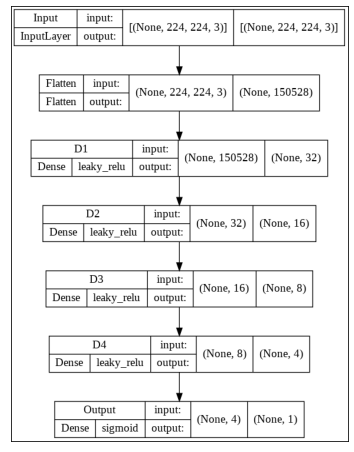

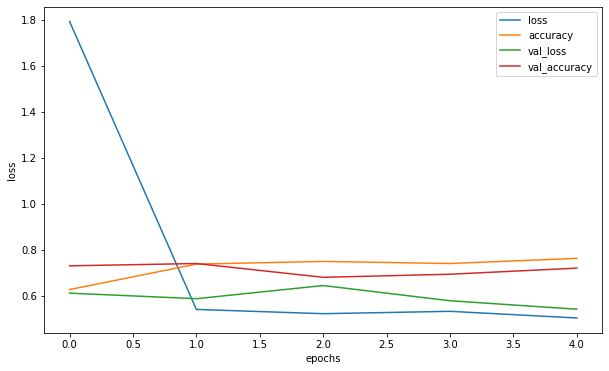

In [ ]:
#--- Build, Compile, and Fit model:
model_1,history_1 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_1,
                                   loss=tf.keras.losses.BinaryCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=None,
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

In [ ]:
#----- Evaluate Model on test Data:
model_1.evaluate(test_data)

16/16 [==============================] - 5s 306ms/step - loss: 0.4500 - accuracy: 0.7900


[0.45000389218330383, 0.7900000214576721]

## A **test accuracy of 79%** is achieved by:
  * Increasing **Width**, and **Depth** of the network
  * Changing the activation function from **relu -> [leaky_relu](https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6)**

### 🔑 The model may not improve with more training since the loss has already begun to taper.

Epoch 1/10
38/38 [==============================] - 23s 610ms/step - loss: 0.4998 - accuracy: 0.7600 - val_loss: 0.5176 - val_accuracy: 0.7633
Epoch 2/10
38/38 [==============================] - 22s 591ms/step - loss: 0.5065 - accuracy: 0.7567 - val_loss: 0.5047 - val_accuracy: 0.7633
Epoch 3/10
38/38 [==============================] - 22s 590ms/step - loss: 0.4767 - accuracy: 0.7800 - val_loss: 0.5168 - val_accuracy: 0.7667
Epoch 4/10
38/38 [==============================] - 22s 588ms/step - loss: 0.5014 - accuracy: 0.7600 - val_loss: 0.5045 - val_accuracy: 0.7867
Epoch 5/10
38/38 [==============================] - 22s 586ms/step - loss: 0.4928 - accuracy: 0.7767 - val_loss: 0.5405 - val_accuracy: 0.7300
Epoch 6/10
38/38 [==============================] - 22s 590ms/step - loss: 0.4747 - accuracy: 0.7800 - val_loss: 0.5191 - val_accuracy: 0.7867
Epoch 7/10
38/38 [==============================] - 22s 590ms/step - loss: 0.5044 - accuracy: 0.7592 - val_loss: 0.4830 - val_accuracy: 0.7967

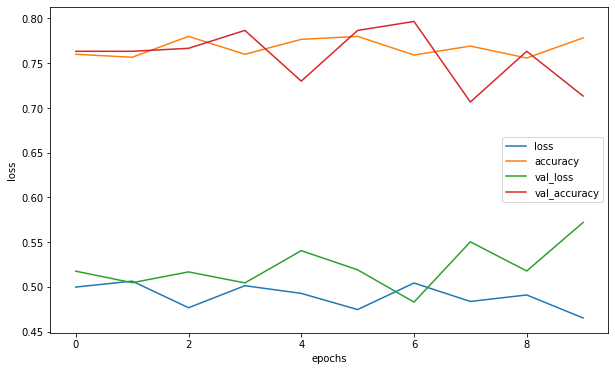

In [ ]:
model_1,history_1 = ContinueTraining(trn_data=train_data,
                                     val_data=valid_data,
                                     model=model_1,
                                     callbacks=None,
                                     epochs=10,
                                     verbose=1)

In [ ]:
#----- Evaluate Model on test Data:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 152ms/step - loss: 0.4566 - accuracy: 0.7720


[0.45656001567840576, 0.7720000147819519]

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 150528)            0         
                                                                 
 D1 (Dense)                  (None, 32)                4816928   
                                                                 
 D2 (Dense)                  (None, 16)                528       
                                                                 
 D3 (Dense)                  (None, 8)                 136       
                                                                 
 D4 (Dense)                  (None, 4)                 36        
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
Total params: 4,817,633
Trainable params: 4,817,633
No

## 🔑 After 15 epochs of training the model is able to achieve a **test accuracy of ~77%**
## 🔑 Note: the **validation loss is increasing** while the training loss is constant, suggesting the model is overfitting. This is reflected in the **decreased accuracy on the test data.**

## ❗ Note that the model required **4,817,633 parameters** to train.

## 🔰*============ Create a Simple CNN Model =============*🔰
 * For CNNs
    * **filters:** Integer, the dimensionality of the output space<br>(i.e. the number of output filters in the convolution).

    * **kernel_size:** An integer or tuple/list of 2 integers, specifying<br>the height and width of the 2D convolution window.

In [ ]:
#--- Architecture:
layers_2 = [Conv2D(filters=10,            
                 kernel_size=3,
                 activation='relu',
                 input_shape=(224,224,3),name='CNN_1'),
            Flatten(name='Flatten_1'),
            Dense(1,
                activation='sigmoid',name='Output')            
          ]

Epoch 1/5
38/38 [==============================] - 31s 620ms/step - loss: 3.5071 - accuracy: 0.6708 - val_loss: 0.8619 - val_accuracy: 0.7267
Epoch 2/5
38/38 [==============================] - 23s 596ms/step - loss: 0.6117 - accuracy: 0.7450 - val_loss: 0.7893 - val_accuracy: 0.6967
Epoch 3/5
38/38 [==============================] - 23s 606ms/step - loss: 0.6075 - accuracy: 0.7400 - val_loss: 0.5796 - val_accuracy: 0.7433
Epoch 4/5
38/38 [==============================] - 24s 622ms/step - loss: 0.5395 - accuracy: 0.7658 - val_loss: 0.7503 - val_accuracy: 0.6933
Epoch 5/5
38/38 [==============================] - 23s 604ms/step - loss: 0.4528 - accuracy: 0.7992 - val_loss: 0.6029 - val_accuracy: 0.7333


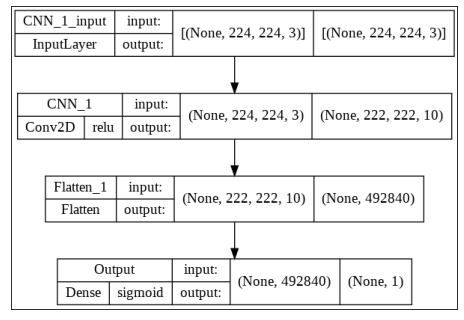

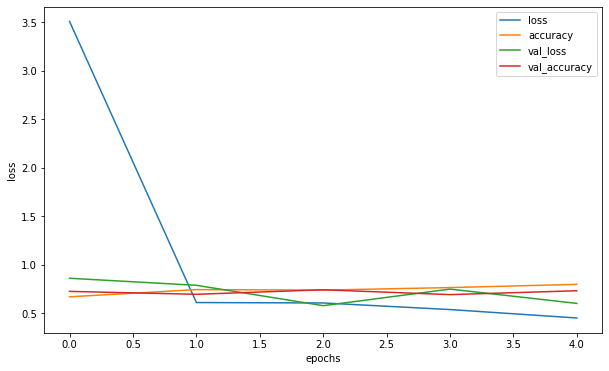

In [ ]:
#--- Build, Compile, and Fit model:
model_2,history2 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_2,
                                   loss=tf.keras.losses.BinaryCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=None,
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

In [ ]:
#----- Evaluate Model on test Data:
model_2.evaluate(test_data)

16/16 [==============================] - 4s 233ms/step - loss: 0.3944 - accuracy: 0.8200


[0.394428014755249, 0.8199999928474426]

## ⚡ Using a single convolutional layer, and a single dense layer the model can predict the test data with **82% accuracy after only 5 epochs!** 


## 🔑 It appears that the loss function has not yet fully tapered, so another round of training will be applied.

Epoch 1/10
38/38 [==============================] - 27s 698ms/step - loss: 0.4566 - accuracy: 0.8100 - val_loss: 0.4936 - val_accuracy: 0.7800
Epoch 2/10
38/38 [==============================] - 23s 607ms/step - loss: 0.4382 - accuracy: 0.8025 - val_loss: 0.5087 - val_accuracy: 0.7767
Epoch 3/10
38/38 [==============================] - 23s 607ms/step - loss: 0.4250 - accuracy: 0.8150 - val_loss: 0.5901 - val_accuracy: 0.7333
Epoch 4/10
38/38 [==============================] - 23s 608ms/step - loss: 0.4922 - accuracy: 0.7783 - val_loss: 0.5143 - val_accuracy: 0.7567
Epoch 5/10
38/38 [==============================] - 23s 608ms/step - loss: 0.4583 - accuracy: 0.8025 - val_loss: 0.4990 - val_accuracy: 0.7667
Epoch 6/10
38/38 [==============================] - 23s 610ms/step - loss: 0.4741 - accuracy: 0.7917 - val_loss: 0.5324 - val_accuracy: 0.7467
Epoch 7/10
38/38 [==============================] - 23s 608ms/step - loss: 0.4663 - accuracy: 0.7900 - val_loss: 0.6397 - val_accuracy: 0.7000

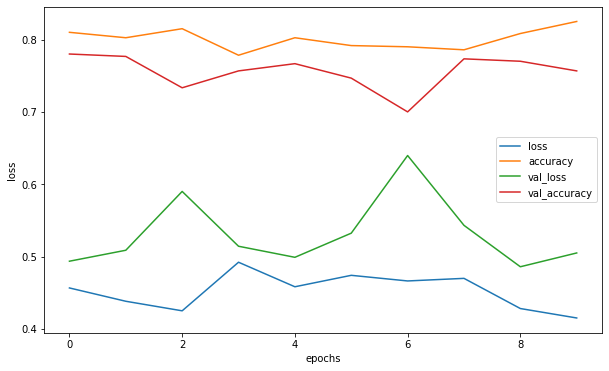

In [ ]:
model_2,history_2 = ContinueTraining(trn_data=train_data,
                                     val_data=valid_data,
                                     model=model_2,
                                     callbacks=None,
                                     epochs=10,
                                     verbose=1)

In [ ]:
#----- Evaluate Model on test Data:
model_2.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.4167 - accuracy: 0.7940


[0.41665297746658325, 0.7940000295639038]

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_1 (Conv2D)              (None, 222, 222, 10)      280       
                                                                 
 Flatten_1 (Flatten)         (None, 492840)            0         
                                                                 
 Output (Dense)              (None, 1)                 492841    
                                                                 
Total params: 493,121
Trainable params: 493,121
Non-trainable params: 0
_________________________________________________________________


###🔑 Despite the additional training, the model is performing worse: 79% test accuracy.<br>&emsp;&ensp; Due to the model **overfitting the training data** (divergance between training & validation loss)<br>&emsp;&ensp; and is therefore lossing the ability to generalize.


## ⚡ **Note:** However, this model required only **493,121 parameters**,<br>a **90% Reduction** in parameters to train!

## 🔰*============ Create a VGG inspired model =============*🔰
  * Use [Tiny VGG architecture](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)

  * Consists of consecutive blocks of 2-3 CNN layers followed by a max pooling layer.
  * Ends in 1-3 sequential Dense layers 

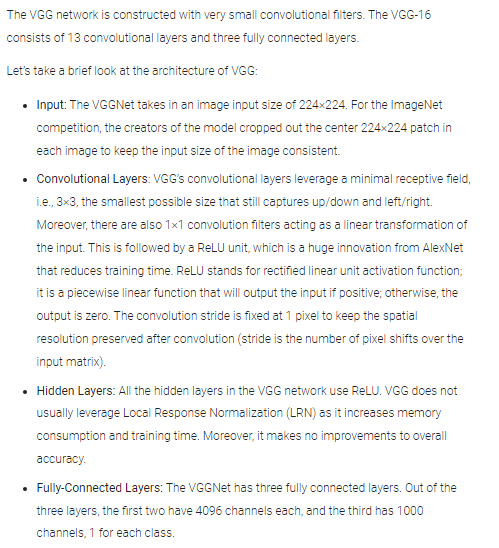

In [ ]:
#--- VGG Architecture:
layers_vgg = [Conv2D(filters=10,
                 kernel_size=3,
                 activation='leaky_relu',
                 input_shape=(224,224,3)),
          Conv2D(filters=10,
                 kernel_size=3,
                 activation='leaky_relu'),
          MaxPool2D(pool_size=2,
                    padding='valid'),
          Conv2D(filters=10,
                 kernel_size=3,
                 activation='leaky_relu'),
          Conv2D(filters=10,
                 kernel_size=3,
                 activation='leaky_relu'),
          MaxPool2D(pool_size=2,
                    padding='valid'),
          Flatten(),
          Dense(1,
                activation='sigmoid')            
          ]

Epoch 1/5
38/38 [==============================] - 25s 621ms/step - loss: 0.6306 - accuracy: 0.6508 - val_loss: 0.5838 - val_accuracy: 0.7233
Epoch 2/5
38/38 [==============================] - 23s 615ms/step - loss: 0.4835 - accuracy: 0.7700 - val_loss: 0.5198 - val_accuracy: 0.7800
Epoch 3/5
38/38 [==============================] - 23s 613ms/step - loss: 0.4792 - accuracy: 0.7733 - val_loss: 0.4941 - val_accuracy: 0.7600
Epoch 4/5
38/38 [==============================] - 24s 619ms/step - loss: 0.4496 - accuracy: 0.7992 - val_loss: 0.5103 - val_accuracy: 0.7567
Epoch 5/5
38/38 [==============================] - 24s 627ms/step - loss: 0.4448 - accuracy: 0.7933 - val_loss: 0.5051 - val_accuracy: 0.7600


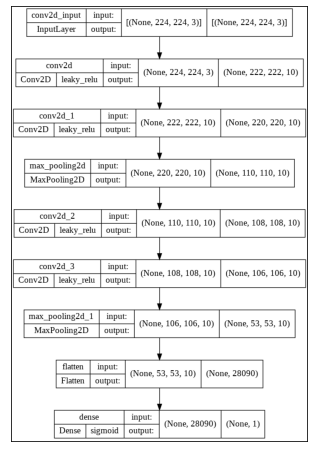

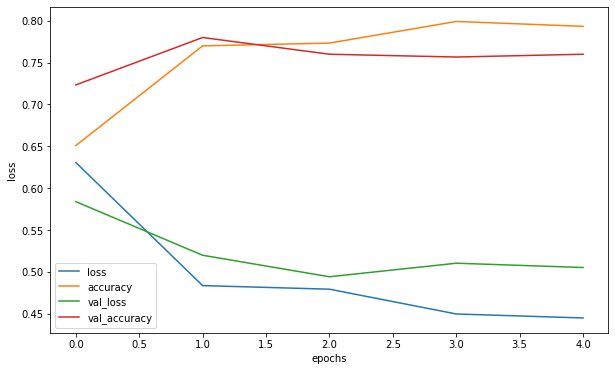

In [ ]:
#--- Build, Compile, and Fit model:
model_3, history_3 = BuildCompileFit(trn_data=train_data,
                                   val_data=valid_data,
                                   layers=layers_vgg,
                                   loss=tf.keras.losses.BinaryCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   callbacks=None,
                                   metrics=['accuracy'],
                                   rndSeed=325,
                                   epochs=5,
                                   verbose=1,
                                   show_model=True)

In [ ]:
#----- Evaluate Model on test Data:
model_3.evaluate(test_data)

16/16 [==============================] - 4s 249ms/step - loss: 0.3828 - accuracy: 0.8220


[0.38276028633117676, 0.8220000267028809]

### 🔑 This model **performs similarly** to the simple CNN model with a **training accuracy ~82% after only 5 epochs** 

Epoch 1/10
38/38 [==============================] - 24s 645ms/step - loss: 0.4437 - accuracy: 0.8100 - val_loss: 0.4891 - val_accuracy: 0.7800
Epoch 2/10
38/38 [==============================] - 24s 635ms/step - loss: 0.4403 - accuracy: 0.8025 - val_loss: 0.4576 - val_accuracy: 0.7800
Epoch 3/10
38/38 [==============================] - 24s 634ms/step - loss: 0.4465 - accuracy: 0.7992 - val_loss: 0.4515 - val_accuracy: 0.8033
Epoch 4/10
38/38 [==============================] - 24s 628ms/step - loss: 0.4143 - accuracy: 0.8142 - val_loss: 0.4678 - val_accuracy: 0.7867
Epoch 5/10
38/38 [==============================] - 24s 629ms/step - loss: 0.4048 - accuracy: 0.8275 - val_loss: 0.4329 - val_accuracy: 0.8000
Epoch 6/10
38/38 [==============================] - 24s 629ms/step - loss: 0.4145 - accuracy: 0.8217 - val_loss: 0.4547 - val_accuracy: 0.8033
Epoch 7/10
38/38 [==============================] - 24s 624ms/step - loss: 0.4052 - accuracy: 0.8225 - val_loss: 0.4336 - val_accuracy: 0.8100

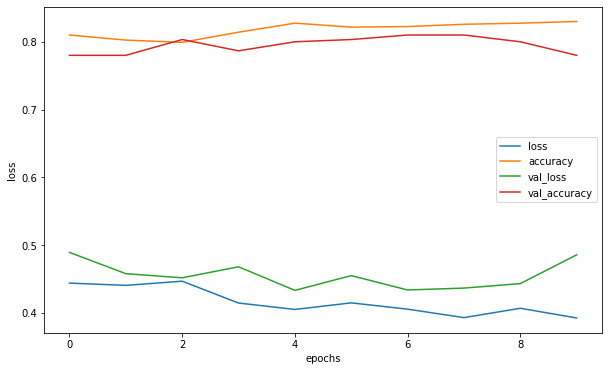

In [ ]:
#---- Continue to Train for an additional 10 epochs:
model_3,history_3 = ContinueTraining(trn_data=train_data,
                                     val_data=valid_data,
                                     model=model_3,
                                     callbacks=None,
                                     epochs=10,
                                     verbose=1)

### 🔑 Note the beginning of validation & training loss **divergence** near the end of training.

In [ ]:
#----- Evaluate Model on test Data:
model_3.evaluate(test_data)

16/16 [==============================] - 4s 214ms/step - loss: 0.3513 - accuracy: 0.8520


[0.3513128459453583, 0.8519999980926514]

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## ⚡ The Tiny-VGG inspired model achieves a **test accuracy ~= 85%**<br>&emsp;&ensp;but **only requires 31,101 trainable parameters**, a **99% reduction!**

# 🔑 Interestingly, all the models seem to begin overfitting after approximately 10 epochs. 

## 🔑 A plausible explanation of the superior performance of the models on the test data is that:
    
##   &emsp; 1. The model begins to overfit the training data.
##   &emsp; 2. The test data is more like the training data than the validation data. 

#📔 Continue to notebook: [03c_CVandCNN_Visualize_Layer_Outputs](https://github.com/delta2echo/tensorflow_portfolio/blob/main/03c_CVandCNN_Visualize_Layer_Outputs.ipynb)